In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()


0

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [16]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [17]:
df.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9102,445,61,2,137655,1,0,1,29909,0,1,0,0


In [20]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [28]:
df.shape

(10000, 12)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [70]:
model=Sequential()
model.add(Dense(12,activation='relu',input_dim=11))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='relu'))

D:\zlib\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 12)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 313 (1.22 KB)

 Trainable params: 313 (1.22 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [85]:
history=model.fit(X_train_scaled,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3328 - val_loss: 0.3880
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3807 - val_loss: 0.4046
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3510 - val_loss: 0.4151
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3458 - val_loss: 0.4085
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3249 - val_loss: 0.4164
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3405 - val_loss: 0.4215
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3391 - val_loss: 0.4112
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3285 - val_loss: 0.3833
Epoch 9/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3366 - val_loss: 0.4104
Epoch 10/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3232 - val_loss: 0.4016
Epoch 11/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3328 - val_loss: 0.4160
Epoch 12/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [89]:
model.layers[2].get_weights()

[array([[ 0.22163717],
        [ 0.5118311 ],
        [ 0.32654878],
        [ 0.23370886],
        [ 0.23674536],
        [-0.46668303],
        [ 0.6502891 ],
        [-0.49604762],
        [-0.07582866],
        [ 0.50687504],
        [ 0.15753774],
        [ 0.11980047]], dtype=float32),
 array([0.04009888], dtype=float32)]

In [86]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [87]:
import numpy as np
y_pred=np.where(y_log>0.5,1,0)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8585

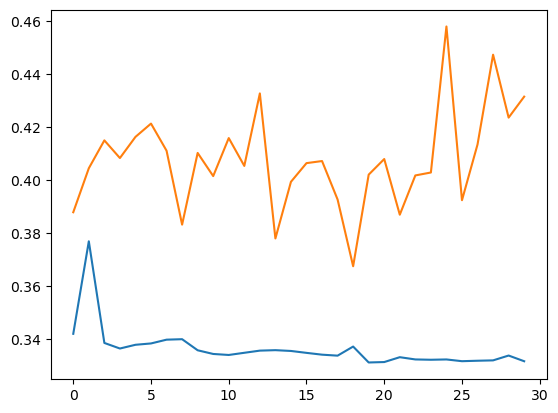

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
